<center style="color:red;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:blue;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
<center style="color:black;font-size:20px;padding:5px"><b><a href="https://github.com/dhptrung/P4DS-FinalProject">Thùng chứa GitHub</a></b></center>

---

| MSSV | Họ và tên | Tài khoản GitHub |
|:----:|:---:|:---:|
|18120066| Bùi Đoàn Hữu Nhân | https://github.com/bdhnhan |
|18120097| Đinh Hữu Phúc Trung| https://github.com/dhptrung |

# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thu thập dữ liệu

## Dữ liệu là về chủ đề gì và lấy từ nguồn nào?

- Chủ đề: Về tuổi thọ của các quốc gia, là tập hợp các yếu tố ảnh hưởng đến tuổi thọ trung bình của các quốc gia trên thế giới.
- Nguồn: Tập dữ liệu được lấy từ Kaggle - [WHO national life expectancy](https://www.kaggle.com/mmattson/who-national-life-expectancy)

## Người ta có cho phép dùng dữ liệu như này không?

- Đây là bộ dữ liệu được tác giả công khai và cung cấp theo giấy phép **CC0: Public Domain (Giấy phép Creative Commons)**.
- Với giấy phép trên tác giả từ chối toàn bộ quyền sở hữu đối với bộ dữ liệu này. Bắt cứ ai đều có thể sao chép, sửa đổi, phân phối, ngay cả cho mục đích thương mại mà không cần xin phép.

## Người ta thu thập dữ liệu như thế nào?

- Bộ dữ liệu này được WHO cung cấp và được thu thập từ nhiều nguồn, chủ yếu là sử dụng thông tin của GHO (Đài quan sát sức khỏe toàn cầu) và UNESCO (Tổ chức Giáo dục, Khoa học và Văn hóa Liên Hợp Quốc).
- Tập dữ liệu được sử dụng trong đồ án này là một phần nhỏ các yếu tố ảnh hưởng đến tuổi thọ của 183 quốc gia và trong khoảng thời gian từ năm 2000 đến năm 2016. 

# Khám phá dữ liệu

## Đọc dữ liệu vào dataframe

In [2]:
pd.set_option('display.max_columns', 32) # Để nhìn rõ hơn
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(3111, 32)

Dữ liệu có **3111 dòng** và **32 cột**.

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát sơ bộ về dữ liệu thì mỗi dòng cho biết thông tin về tuổi thọ trung bình và các yếu tố ảnh hưởng đến tuổi thọ trung bình của một quốc gia trong một năm. Không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows = df.duplicated().any()
have_duplicated_rows

False

Dữ liệu không có dòng nào bị lặp.

## Mỗi cột có ý nghĩa gì?

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***country*** | Tên quốc gia |
| ***country_code*** | Mã định danh quốc gia gồm 3 chữ cái |
| ***region*** | Khu vực của quốc gia |
| ***year*** | Năm |
| ***life_expect*** | Tuổi thọ trung bình trong năm |
| ***life_exp60*** | Tỉ lệ dân số có tuổi thọ 60+ |
| ***adult_mortality*** | Tỷ lệ tử vong ở người trưởng thành của cả 2 giới (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
| ***infant_mort*** | Tỷ lệ tử vong đến 1 tuổi |
| ***age1-4mort*** | Tỷ lệ tử vong trong độ tuổi từ 1 đến 4 |
| ***alcohol*** | Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận (tính bằng lít rượu nguyên chất) |
| ***bmi*** | BMI trung bình (kg/m^2) (18+) (ước tính theo tuổi được chuẩn hóa) |
| ***age5-19thinness*** | Tỷ lệ gầy ở trẻ em và thanh thiếu niên, BMI < (trung bình - 2s.d.) (ước tính thô) (%) |
| ***age5-19obesity*** | Tỷ lệ béo phì ở trẻ em và thanh thiếu niên, BMI > (trung bình + 2s.d.) (ước tính thô) (%) |
| ***hepatitis*** | Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%) |
| ***measles*** | Tỷ lệ tiêm ngừa vắc xin sởi mũi 1 (MCV1) ở trẻ 1 tuổi (%) |
| ***polio*** | Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%) |
| ***diphtheria*** | Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%) |
| ***basic_water*** | Tỷ lệ dân số sử dụng ít nhất các dịch vụ nước uống cơ bản |
| ***doctors*** | Số bác sĩ y khoa (trên 10.000 dân) |
| ***hospitals*** | Mật độ bệnh viện trên 100.000 dân |
| ***gni_capita*** | Tổng thu nhập quốc dân trên đầu người |
| ***gghe-d*** | Chi tiêu chung cho y tế của chính phủ trong nước (GGHE-D) tính theo phần trăm tổng sản phẩm quốc nội (GDP) |
| ***che_gdp*** | Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%) |
| ***une_pop*** | Dân số (hàng nghìn) |
| ***une_infant*** | Số ca tử vong trung bình ở trẻ sơ sinh (trên 1.000 trẻ đẻ sống) |
| ***une_life*** | Tuổi thọ trung bình theo UNESCO (năm) |
| ***une_hiv*** | Tỷ lệ nhiễm HIV (% dân số từ 15-49 tuổi) |
| ***une_gni*** | GNI bình quân đầu người theo UNESCO (đô la quốc tế hiện tại) |
| ***une_poverty*** | Tỷ lệ nghèo đói ở mức 1,90 đô la một ngày (PPP) (% dân số) |
| ***une_edu_spend*** | Chi tiêu của chính phủ cho giáo dục tính theo tỷ lệ phần trăm của GDP (%) |
| ***une_literacy*** | Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (%) |
| ***une_school*** | Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới |

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

Tất cả các cột đều đã có kiểu dữ liệu phù hợp.

# Tiền xử lý dữ liệu

Trong dữ liệu có các cột có ý nghĩa tương tự nhau nhưng vì thông tin được lấy từ 2 nguồn khác nhau nên giá trị có lệch nhau đôi chút. Ta sẽ tiến hành loại bỏ đi 1 cột trong các cặp cột có ý nghĩa tương tự nhau, ưu tiên loại bỏ các cột có tỉ lệ giá trị thiếu cao hơn. 

- Cặp "life_expect" và "une_life" (tuổi thọ trung bình)
- Cặp "gni_capita" và "une_gni" (GNI)
- Cặp "infant_mort" và "une_infant" (tỉ lệ tử vong trẻ sơ sinh)

Đồng thời, ta sẽ xóa thêm cột "country_code" vì đây là mã định danh cho quốc gia nên sẽ tương tự với cột tên quốc gia "country".

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
cols = ['life_expect', 'une_life', 'gni_capita', 'une_gni', 'infant_mort', 'une_infant']
df[cols].agg([missing_ratio])

,life_expect,une_life,gni_capita,une_gni,infant_mort,une_infant
missing_ratio,0.0,0.0,21.922212,3.760849,0.0,0.0


Do chỉ có cặp "gni_capita" và "une_gni" có tỉ lệ thiếu khác nhau nên ta sẽ chọn xóa cột "gni_capita" vì có tỉ lệ thiếu cao hơn. Hai cặp còn lại ta xóa cột chứa thông tin từ nguồn UNESCO (vì đa số các cột dữ liệu lấy từ nguồn GHO nên ta giữ lại các cột của GHO để dễ đồng nhất).

In [7]:
df.drop(columns=['une_life', 
                 'gni_capita', 
                 'une_infant', 
                 'country_code'], inplace=True)

# Khám phá dữ liệu (tiếp tục)

## Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`.

In [8]:
cate_cols = ['country', 'region']
nume_cols = list(set(df.columns) - set(cate_cols))
nume_col_profiles_df = df[nume_cols].agg([missing_ratio, min, max])
nume_col_profiles_df

,une_poverty,year,age5-19thinness,polio,age1-4mort,basic_water,alcohol,une_gni,measles,infant_mort,life_exp60,hospitals,une_hiv,doctors,une_literacy,bmi,une_school,hepatitis,diphtheria,life_expect,age5-19obesity,gghe-d,une_pop,adult_mortality,une_edu_spend,che_gdp
missing_ratio,70.652523,0.0,1.092896,0.610736,0.000000,1.028608,1.60720,3.760849,0.610736,0.000000,0.00000,95.821279,23.818708,42.783671,81.645773,1.092896,74.124076,18.289939,0.610736,0.00000,1.092896,3.214401,1.189328e+00,0.00000,41.337191,3.760849
min,0.100000,2000.0,0.100000,8.000000,0.000065,18.695210,0.00000,420.000000,16.000000,0.001470,10.72800,0.000000,0.100000,0.128000,14.376040,19.800000,0.559340,2.000000,19.000000,36.22736,0.100000,0.062360,7.601600e+01,49.20185,0.787440,1.025160
max,94.100000,2016.0,28.100000,99.000000,0.039095,100.000010,20.18246,122670.000000,99.000000,0.164515,26.39402,56.446950,28.200000,79.541000,99.998190,32.200000,14.378800,99.000000,99.000000,84.16616,26.700000,12.062730,1.414049e+06,696.87420,14.059080,20.413410


Min, max không có gì bất thường ở đây cả!

**Tiếp tục khám phá các cột numeric**

Xem thử tần suất xuất hiện của các năm trong dữ liệu có bằng nhau không?

In [9]:
df['year'].value_counts().sort_index()

2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
Name: year, dtype: int64

*Nhận xét:* Mỗi năm đều chiếm 183 dòng trong dữ liệu. Điều này là hợp lý, vì theo mô tả, dữ liệu là thông tin của 183 quốc gia trong 17 năm (2000 - 2016) và mỗi dòng là mỗi quốc gia trong 1 năm.

Trực quan phân phối giá trị của cột "life_expect".

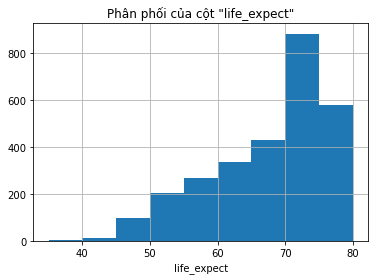

In [10]:
df['life_expect'].hist(bins=np.arange(35, 85, 5))
plt.xlabel('life_expect')
plt.title('Phân phối của cột "life_expect"')
plt.show()

*Nhận xét:* Tuổi thọ trung bình mỗi năm của mỗi nước (trong phạm vi tập dữ liệu) chủ yếu rơi vào khoảng 65-80 tuổi.

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Sau đó lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 2 cột là "country", "region". 

In [11]:
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn
def num_diff_vals(s):
    return s.dropna().nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,country,region
missing_ratio,0.0,0.0
num_diff_vals,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, United Republic of Tanzania, Uganda, South Africa, Zambia, Zimbabwe, South Sudan, Sao Tome and Principe, Eswatini, Seyche...","[Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific]"


Không có gì bất thường ở đây cả!

**Tiếp tục khám phá các cột categorical**

Xem thử tần suất xuất hiện của các quốc gia trong dữ liệu như thế nào?

In [12]:
df['country'].value_counts()

Benin       17
Liberia     17
Lesotho     17
Angola      17
Malawi      17
            ..
Canada      17
Myanmar     17
Cameroon    17
Qatar       17
Eritrea     17
Name: country, Length: 183, dtype: int64

*Nhận xét:* Mỗi quốc gia trong dữ liệu đều chiếm 17 dòng (điều này là hợp lý, như đã giải thích ở trên).

Trực quan tần suất xuất hiện của các khu vực trong dữ liệu.

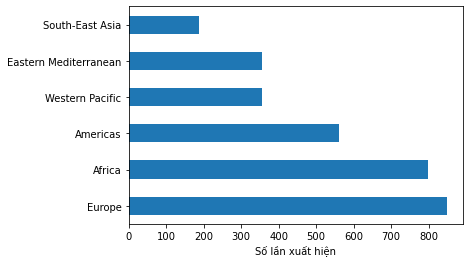

In [13]:
df['region'].value_counts().plot.barh()
plt.xlabel('Số lần xuất hiện')
plt.show()

*Nhận xét*: Như vậy trong dữ liệu, các quốc gia ở khu vực **Europe** là xuất hiện nhiều nhất, sau đó đến khu vực **Africa**, **Americas** và các khu vực khác.

# Tiền xử lý dữ liệu (tiếp tục)

Vì các cột "hospitals", "doctors", "une_edu_spend", "une_poverty", "une_school", "une_literacy" có tỉ lệ % giá trị thiếu cao nên ta sẽ tiến hành xóa các cột này đi.

In [14]:
df.drop(columns=['hospitals', 
                 'doctors', 
                 'une_edu_spend', 
                 'une_poverty',
                 'une_school', 
                 'une_literacy'], inplace=True)

**Số dòng, số cột của dữ liệu sau khi tiền xử lý.**

In [15]:
df.shape

(3111, 22)

# Đưa ra các câu hỏi cần trả lời

## Câu hỏi là gì?

- **Câu 1:** Thứ tự của các yếu tố trong dữ liệu là như thế nào khi xét theo mức độ ảnh hưởng đến tuổi thọ trung bình từ nhiều đến ít?
- **Câu 2:** Top 5 các quốc gia nào có sự cải thiện về tuổi thọ trung bình tốt nhất trong giai đoạn từ năm 2000 - 2016?
- **Câu 3:** Tỉ lệ béo phì của các khu vực trong 3 năm đầu (2000 - 2002) và 3 năm cuối (2014 - 2016) thay đổi như thế nào?

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

- **Câu 1:** Nắm bắt được mức độ ảnh hưởng của các yếu tố đến tuổi thọ trung bình của quốc gia, từ đó quốc gia có thể điều chỉnh chính sách về y tế, giáo dục, kinh tế... để cải thiện tuổi thọ của người dân hoặc kiểm soát tuổi thọ phục vụ cho các chính sách phát triển đất nước.
- **Câu 2:** Biết được trong vòng 17 năm kể từ năm 2000 đến 2016, qua nhiều sự phát triển về khoa học kỹ thuật và y tế, các quốc gia có sự cải thiện về tuổi thọ trung bình hay không? Qua đó đánh giá được sự cải thiện về đời sống, dịch vụ y tế của từng quốc gia hay các yếu tố sinh hoạt văn hóa khác ẩn trong đó. Nắm bắt top 5 các quốc gia (thuộc phạm vi tập dữ liệu) có sự cải thiện tốt nhất về tuổi thọ trung bình, qua đó các quốc gia khác có thể học hỏi các chính sách để có thể cải thiện phần nào chất lượng cuộc sống tại quốc gia của mình.
- **Câu 3:** Việt Nam chắc thường nghe đến việc tỉ lệ béo phì tại các nước phương Tây có xu hướng cao hơn nhiều so với các quốc gia phương Đông, do một phần các cửa hàng thức ăn nhanh (FastFood) là xu hướng tại các quốc gia phương Tây. Với sự phát triển của thức ăn nhanh chuẩn phương Tây như gà rán, khoai tây chiên, thức uống coca,... Các dịch vụ đó không khó khăn khi bắt đầu tiếp cận với các nước phương Đông như Trung Quốc, Nhật Bản, Hàn Quốc và đặc biệt là Việt Nam. Qua đó, chúng ta muốn xem thử rằng, với sự phát triển đó, thì liệu tỉ lệ béo phì tại các nước phương Tây và phương Đông tại thời điểm trước đó có khác biệt gì so với hiện tại khi yếu tố là thức ăn nhanh được phủ rộng và từ đó các quốc gia có thể quyết định đưa ra các chính sách kiểm soát cũng như cảnh tỉnh người dân trước tình trạng béo phì kịp thời.

# Tiền xử lý + phân tích dữ liệu để trả lời câu hỏi

## Câu 1

### Tiền xử lý (nếu có)

### Phân tích

## Câu 2

### Tiền xử lý (nếu có)

### Phân tích

In [212]:
def enhancelife_expect(s):
#     pow(s.iloc[-1]/s.iloc[0],1/17)-1
    return s.iloc[-1]-s.iloc[0]
df.groupby('country')['life_expect'].agg(
    ['min','max',enhancelife_expect]).sort_values('enhancelife_expect', ascending=False).head(5)

,min,max,enhancelife_expect
country,,,
Rwanda,46.57228,68.03925,21.46697
Eritrea,43.93246,64.96657,21.03411
Malawi,45.90067,64.17274,18.27207
Zambia,44.42588,62.32869,17.90281
Botswana,47.55310,66.05297,16.94230


## Câu 3

In [213]:
df_bmi_by_year = df.groupby(['region','year'])['bmi'].agg('mean').unstack(1)
df_bmi_by_year.index.name = None
df_bmi_by_year.columns.name = None

df_bmi = pd.DataFrame(index=df_bmi_by_year.index, 
                  columns=["first_year", "last_year"])

df_bmi['first_year'] = df_bmi_by_year[df_bmi_by_year.columns[:3]].mean(axis=1)
df_bmi['last_year'] = df_bmi_by_year[df_bmi_by_year.columns[-3:]].mean(axis=1)

df_bmi

,first_year,last_year
Africa,22.457246,23.489130
Americas,25.717172,27.102020
Eastern Mediterranean,25.623333,26.671667
Europe,25.603333,26.434667
South-East Asia,21.645455,22.990909
Western Pacific,24.917460,26.026984


# Nhìn lại quá trình làm đồ án

## Đã gặp những khó khăn gì?

### Nhân

### Trung

## Có học được gì hữu ích không?

### Nhân 

### Trung

## Nếu có thêm thời gian thì sẽ làm gì?

# Tài liệu tham khảo